<a href="https://colab.research.google.com/github/LiamJHowarth/FA_Library/blob/main/Engineering_Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Engineering **Brownian Motion** in Python

---



Intuition & Scope

---



Series Expansion for Brownian Motion


1.   **Orthonormal System:** Brownian motion, restricted to an interval like [0], can be expressed as a series of orthogonal functions.

2.   **Cosine Basis:** If the orthonormal system is based on sine functions, an alternative involves using a Fourier cosine series, which also yields an expansion.

3.   **Combined Expansion:** The cosine series can be combined with other series expansions to create alternative representations of Brownian motion.





First, we must import NumPy.

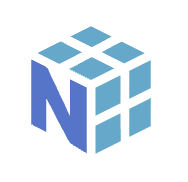

**Powerful N-dimensional arrays**

*Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today.*

In [16]:
import numpy as np

Now, let's define a **function**.

In [ ]:
def brownian_motion(steps=100, terms=500, paths=20): #design our function - don't run.

The parameters are optional to be called inside the block. **'Steps'** refer to the number of timesteps required for the simulation. 100 steps are also known as *increments.*

Moreover, the parameter **'terms'** is important for reducing approximation error, for the cosine series expansion required. The number of terms used internally is determined by the implementation details of the algorithm and aims for a specific level of *precision.*

While we are engineering the stochastic process, our goal is to simulate and plot the paths **visually**. We input the parameter 'paths' and assign a default **value** of '20' to give us a number of independent brownian motion paths to *observe.*

Now, let's add our **array** structure.

In [ ]:
t = np.linspace(0, 1, steps)
    Bt = np.zeros((paths, steps))

LinSpace Returns num evenly spaced samples, calculated over the interval [start, stop]. It's commonly used to define a time or space axis.

The matrix Bt is essentially a **blank grid** that will be filled with the calculated positions of the Brownian particle at each time step for every path.

We call *np.zeros* to initialize a 2-dimensional array (**a matrix**) in NumPy, setting all its elements to zero. This is used to reserve space for the simulation results.

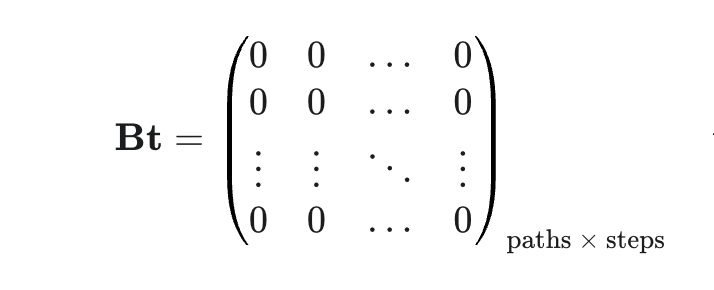

Let us design the algorithm such that nested loops can compute the brownian motion accuractely, leveraging **vectors.**

Let's us **iterate.**

Starts a loop that iterates on the number of paths. p is the index for the current path being simulated (row index in Bt).

In [ ]:
for p in range(paths):

Now, generate a 1-D array (Z) of the number of terms. Independent random numbers drawn from a standard normal distribution **mu**, and **sigma**. This is the key source of randomness for the simulation.

In [ ]:
Z = np.random.normal(0, 1, n_terms)

Create a 1-D array (k) of integers from 1 up to terms default value. This array is used to index the terms in the Karhunen-Loève series expansion.

In [ ]:
k = np.arange(1, n_terms + 1)

Now we have computed the algo for each path, it is time to determine the value of the path at each time step. We will perform **a nested loop.** By placing the generation of the random vector Z, each path gets a unique set of random inputs, guaranteeing that the simulated paths are statistically independent.

Start a loop that iterates over the time array t (created with np.linspace as above). i is the index for the current time step (column index in Bt), and ti is the **actual time value**.

In [ ]:
for i, ti in enumerate(t):


The spectral representation of Brownian Motion requires us to calculate the terms of the **cosine series expansion** for the current time point ti. We can compute the values of the eigenfunctions (the deterministic part of the series) for the current time ti across all k terms. The result is a 1-D array (sin_terms) with the terms elements.

In [ ]:
            cosine = np.sin((k - 0.5) * np.pi * ti) / ((k - 0.5) * np.pi)

This line calculates the value of the Brownian motion at the current time point ti for the current path p.


It does this by taking the **dot product** of the **random coefficients** Z and the calculated sin_terms, and then **scaling** by sqrt(2).

In [ ]:
            Bt[p, i] = np.sqrt(2) * np.dot(Z, sin_terms)

Our computation is **complete**! Let's return the function value and finally see some results.

In [ ]:
return Bt

Once all paths and all time steps are calculated, the final matrix Bt containing all simulated results is returned.

In [51]:
def brownian_motion(steps=100, n_terms=500, paths=20):
    t = np.linspace(0, 1, steps)
    Bt = np.zeros((paths, steps))
    for p in range(paths):
        Z = np.random.normal(0, 1, n_terms)
        k = np.arange(1, n_terms + 1)
        for i, ti in enumerate(t):
            sin_terms = np.sin((k - 0.5) * np.pi * ti) / ((k - 0.5) * np.pi)
            Bt[p, i] = np.sqrt(2) * np.dot(Z, sin_terms)
    return Bt


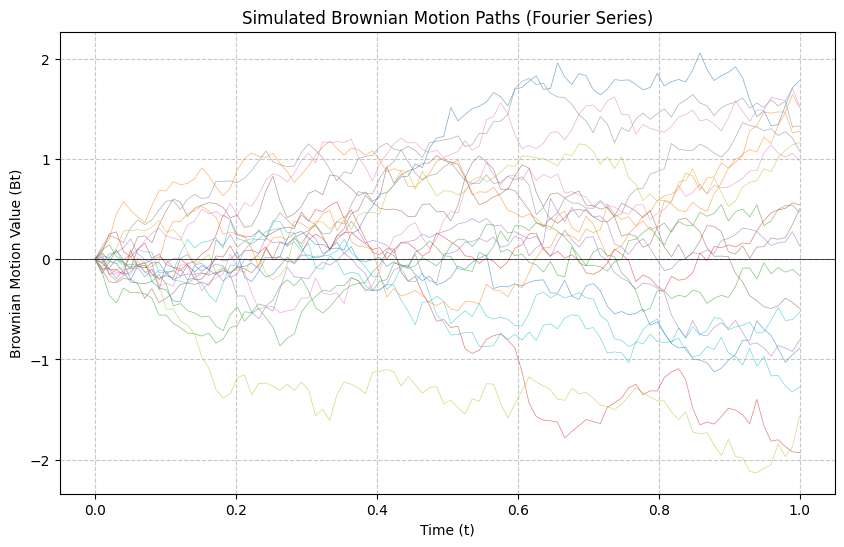

In [55]:
import matplotlib.pyplot as plt

steps = 100
paths = 20
n_terms = 500
Bt = brownian_motion(steps=steps, n_terms=n_terms, paths=paths)

t = np.linspace(0, 1, steps)

plt.figure(figsize=(10, 6))

for p in range(paths):
    plt.plot(t, Bt[p, :], linewidth=0.5, alpha=0.6)

plt.title('Simulated Brownian Motion Paths (Fourier Series)')
plt.xlabel('Time (t)')
plt.ylabel('Brownian Motion Value (Bt)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()